In [13]:
import os
import pandas as pd
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#defining paths to your data
DATA2_PATH = r"C:\Users\B.BASI REDDY\Documents\TB_Chest_Radiography_Database"
DATA2_TRAIN_NORMAL = os.path.join(DATA2_PATH, "Normal")
DATA2_TRAIN_TUBERCULOSIS = os.path.join(DATA2_PATH, "Tuberculosis")

In [4]:
# Load image file lists
normal_img = os.listdir(DATA2_TRAIN_NORMAL)
tuberculosis_img = os.listdir(DATA2_TRAIN_TUBERCULOSIS)


In [5]:
# Create dataframes with labels
df_normal = pd.DataFrame(normal_img, columns=["images"])
df_normal["labels"] = 0  # Label for normal
df_normal["images"] = DATA2_TRAIN_NORMAL + "/" + df_normal["images"]
df_tuberculosis = pd.DataFrame(tuberculosis_img, columns=["images"])
df_tuberculosis["labels"] = 1  # Label for tuberculosis
df_tuberculosis["images"] = DATA2_TRAIN_TUBERCULOSIS + "/" + df_tuberculosis["images"]

In [6]:
# Concatenate dataframes
data_df = pd.concat([df_normal, df_tuberculosis], ignore_index=True)
data_df = data_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [7]:
image_size = (224, 224)
X = []
for img_path in data_df["images"]:
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:  # Check if the image was loaded successfully
        img = cv2.resize(img, image_size)
        X.append(img)

X = np.array(X)
X = X / 255.0  # Normalize images
X = X.reshape(X.shape[0], 224, 224, 1)
Y = data_df["labels"]

In [8]:
min_length = min(len(X), len(Y))
X = X[:min_length]
Y = Y[:min_length]
Y = keras.utils.to_categorical(Y, num_classes=2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = np.reshape(X_train, (X_train.shape[0], 224, 224, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 224, 224, 1))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(64, 224, 224, 1)
(64, 2)
(16, 224, 224, 1)
(16, 2)


In [9]:
batch_size = 32
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    validation_split=0.2
)

train_generator = train_datagen.flow(X_train, Y_train, batch_size=batch_size, subset='training')
validation_generator = train_datagen.flow(X_train, Y_train, batch_size=batch_size, subset='validation')

In [10]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       1

In [11]:
#training the model
history=model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test),batch_size=64) 

Epoch 1/10
1/1 [==============================] - 31s 31s/step - loss: 0.6968 - accuracy: 0.4219 - val_loss: 0.7781 - val_accuracy: 0.4375
Epoch 2/10
1/1 [==============================] - 5s 5s/step - loss: 0.6956 - accuracy: 0.5156 - val_loss: 1.1772 - val_accuracy: 0.5625
Epoch 3/10
1/1 [==============================] - 4s 4s/step - loss: 1.3186 - accuracy: 0.4844 - val_loss: 0.6714 - val_accuracy: 0.8125
Epoch 4/10
1/1 [==============================] - 5s 5s/step - loss: 0.6660 - accuracy: 0.8750 - val_loss: 0.9162 - val_accuracy: 0.4375
Epoch 5/10
1/1 [==============================] - 5s 5s/step - loss: 0.8134 - accuracy: 0.5156 - val_loss: 0.7428 - val_accuracy: 0.4375
Epoch 6/10
1/1 [==============================] - 6s 6s/step - loss: 0.6977 - accuracy: 0.5156 - val_loss: 0.6996 - val_accuracy: 0.4375
Epoch 7/10
1/1 [==============================] - 4s 4s/step - loss: 0.6711 - accuracy: 0.5156 - val_loss: 0.6811 - val_accuracy: 0.4375
Epoch 8/10
1/1 [=======================

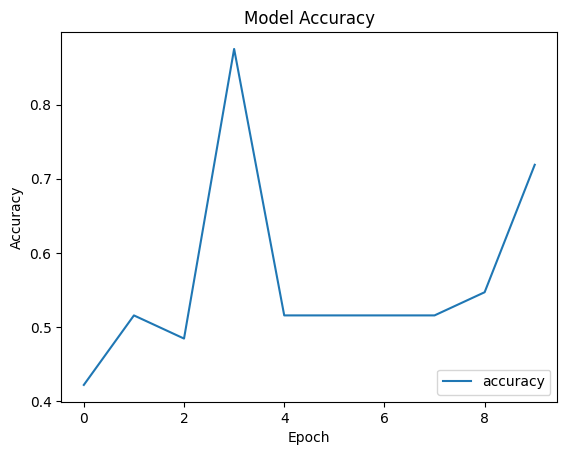

NameError: name 'confusion' is not defined

In [12]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend(loc='lower right')
plt.show()
accuracy = (confusion[0, 0] + confusion[1, 1]) / np.sum(confusion)

print(f'Accuracy: {accuracy:.2%}')

In [35]:
Y_pred = model.predict(X_test)
Y_pred=(Y_pred>0.5)
Y_true = np.argmax(Y_test, axis=1)
Y_pred = np.argmax(Y_pred, axis=1)

1/1 [==============================] - 0s 479ms/step


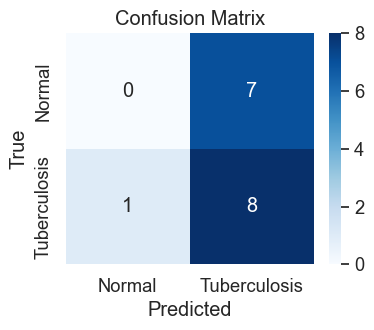

In [36]:
# Calculate and plot the confusion matrix
confusion = confusion_matrix(Y_true, Y_pred)
class_labels = ['Normal', 'Tuberculosis']

plt.figure(figsize=(4, 3))
sns.set(font_scale=1.2)
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [37]:
precision = precision_score(Y_true,Y_pred, zero_division=1)
f1 = f1_score(Y_true, Y_pred, zero_division=1)
print("Classification Report:")
print(classification_report(Y_true,Y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.53      0.89      0.67         9

    accuracy                           0.50        16
   macro avg       0.27      0.44      0.33        16
weighted avg       0.30      0.50      0.38        16



In [1]:
import random as rd

plt.figure(figsize=(15, 12))

for i in range(20):
    random_idx = rd.randint(0, len(data_df) - 1)
    img_path = data_df['images'][random_idx]
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    if img is not None and img.size > 0:
        img = cv2.resize(img, (224, 224))
        img = np.expand_dims(img, axis=0)
        actual_class = "Tuberculosis" if data_df['labels'][random_idx] == 1 else "Normal"

        # Predict class probabilities
        class_probabilities = model.predict(img)

        # Determine the predicted class based on the highest probability
        if class_probabilities[0, 1] > class_probabilities[0, 0]:
            predicted_class = "Tuberculosis"
        else:
            predicted_class = "Normal"

        plt.subplot(4, 5, i + 1)
        plt.imshow(img[0], cmap='gray')
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}")
        plt.axis('off')
    else:
        print(f"Image at index {random_idx} could not be loaded.")

plt.show()


NameError: name 'plt' is not defined